In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import scipy.ndimage
from skimage.feature import hog
from skimage import data, color, exposure
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib


In [ ]:
import os
import pandas as pd
filenames = os.listdir("/content/drive/My Drive/RC")
categories = []
for filename in filenames:
    category = filename.split('_1')[0]
    if category == '/content/drive/My Drive/RC/txt_mudit_b11_11597.jpg':
        categories.append(0)
    else:
        categories.append(1)

df2= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'average', 'minimum', 'concatenate', 'gray', 'info', 'multiply', 'maximum', 'add', 'subtract', 'dot', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


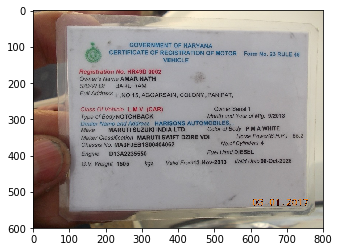

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/RC/txt_mudit_b11_1332.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
pip install Pillow

In [ ]:
pip install Pytesseract

In [ ]:
imgf=os.listdir("/content/drive/My Drive/RC")

In [ ]:
import pandas as pd
df = pd.DataFrame(imgf, columns = ['Image_name'])
df.head()

,Image_name
0,txt_mudit_b8_1_545.jpg
1,txt_mudit_b8_1_571.jpg
2,txt_mudit_b8_1_808.jpg
3,txt_mudit_b8_1_546.jpg
4,txt_mudit_b8_1_513.jpg


In [ ]:
df.reset_index(drop=True,inplace = True)
df.head()

,Image_name
0,txt_mudit_b8_1_545.jpg
1,txt_mudit_b8_1_571.jpg
2,txt_mudit_b8_1_808.jpg
3,txt_mudit_b8_1_546.jpg
4,txt_mudit_b8_1_513.jpg


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=0 )
train.head()

,Image_name
30,txt_mudit_b11_1365.jpg
38,txt_mudit_b11_1524.jpg
42,txt_mudit_b11_1536.jpg
2,txt_mudit_b8_1_808.jpg
45,txt_mudit_b11_11599.jpg


In [ ]:
test.head()

,Image_name
25,txt_mudit_b11_1339.jpg
22,txt_mudit_b11_1343.jpg
28,txt_mudit_b11_1328.jpg
4,txt_mudit_b8_1_513.jpg
10,txt_mudit_b8_1_742.jpg


In [ ]:
print(train.shape , test.shape)

(36, 1) (10, 1)


In [ ]:
X_train =train
X_val  =test



In [ ]:
pip install Pytesseract

     |████████████████████████████████| 174kB 2.9MB/s 
  Created wheel for Pytesseract: filename=pytesseract-0.2.7-py2.py3-none-any.whl size=165734 sha256=7d8eeac81b3d339b3051b88437ad083bdcad77034f62adb51f6cb4d073d4b643
  Stored in directory: /root/.cache/pip/wheels/cd/4a/30/998e01b892300ba0ccce7b806b6e889794605a384dac81a49a
Successfully built Pytesseract


In [ ]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/My Drive/RC')
#convert my image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#perform adaptive threshold so that I can extract proper contours from the image
#need this to extract the name plate from the image. 
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours,h = cv2.findContours(thresh,1,2)

#once I have the contours list, i need to find the contours which form rectangles.
#the contours can be approximated to minimum polygons, polygons of size 4 are probably rectangles
largest_rectangle = [0,0]
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4: #polygons with 4 points is what I need.
        area = cv2.contourArea(cnt)
        if area > largest_rectangle[0]:
            #find the polygon which has the largest size.
            largest_rectangle = [cv2.contourArea(cnt), cnt, approx]

x,y,w,h = cv2.boundingRect(largest_rectangle[1])
#crop the rectangle to get the number plate.
roi=img[y:y+h,x:x+w]
#cv2.drawContours(img,[largest_rectangle[1]],0,(0,0,255),-1)
plt.imshow(roi, cmap = 'gray')
plt.show()

error: ignored

In [ ]:
from PIL import Image
import numpy as np

def load_image(RC) :
    img = Image.open(RC )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, Final) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( Final )


In [ ]:
def save_model(model):
    model_json = model.to_json()
    with open("RC.json", "w") as json_file:
        json_file.write(model_json)

In [ ]:
def load_model(strr):        
    json_file = open(strr, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    return loaded_model
    


In [ ]:
def yolo_model(input_shape):
    
    
    inp = Input(input_shape)
   
    model = MobileNetV2( input_tensor= inp , include_top=False, weights='imagenet')
    last_layer = model.output
    
    conv = Conv2D(512,(3,3) , activation='relu' , padding='same')(last_layer)
    conv = Dropout(0.4)(conv)
    bn = BatchNormalization()(conv)
    lr = LeakyReLU(alpha=0.1)(bn)
    
    
    conv = Conv2D(128,(3,3) , activation='relu' , padding='same')(lr)
    conv = Dropout(0.4)(conv)
    bn = BatchNormalization()(conv)
    lr = LeakyReLU(alpha=0.1)(bn)
    
    
    conv = Conv2D(5,(3,3) , activation='relu' , padding='same')(lr)
    
    final = Reshape((grid_h,grid_w,classes,info))(conv)
    
    model = Model(inp,final)
    
    return model


In [ ]:
#define utils

#optimizer
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

#checkpoint
checkpoint = ModelCheckpoint('model1/text_detect.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min',period=1)

In [ ]:
#define loss function
def yolo_loss_func(y_true,y_pred):
    # y_true : 16,16,1,5
    # y_pred : 16,16,1,5
    l_coords = 5.0
    l_noob = 0.5
    coords = y_true[:,:,:,:,0] * l_coords
    noobs = (-1*(y_true[:,:,:,:,0] - 1)*l_noob)
    p_pred = y_pred[:,:,:,:,0]
    p_true = y_true[:,:,:,:,0]
    x_true = y_true[:,:,:,:,1]
    x_pred = y_pred[:,:,:,:,1]
    yy_true = y_true[:,:,:,:,2]
    yy_pred = y_pred[:,:,:,:,2]
    w_true = y_true[:,:,:,:,3]
    w_pred = y_pred[:,:,:,:,3]
    h_true = y_true[:,:,:,:,4]
    h_pred = y_pred[:,:,:,:,4]
    
    p_loss_absent = K.sum(K.square(p_pred - p_true)*noobs)
    p_loss_present = K.sum(K.square(p_pred - p_true))
    x_loss = K.sum(K.square(x_pred - x_true)*coords)
    yy_loss = K.sum(K.square(yy_pred - yy_true)*coords)
    xy_loss = x_loss + yy_loss
    w_loss = K.sum(K.square(K.sqrt(w_pred) - K.sqrt(w_true))*coords)
    h_loss = K.sum(K.square(K.sqrt(h_pred) - K.sqrt(h_true))*coords)
    wh_loss = w_loss + h_loss
    
    loss = p_loss_absent + p_loss_present + xy_loss + wh_loss
    
    return loss

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 513, 513, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 256, 256, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 256, 256, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [ ]:
model.compile(loss=yolo_loss_func , optimizer=opt , metrics = ['accuracy'])

In [ ]:
def predict_func(model , inp , iou , name):

    ans = model.predict(inp)
    
    #np.save('Results/ans.npy',ans)
    boxes = decode(ans[0] , img_w , img_h , iou)
    
    img = ((inp + 1)/2)
    img = img[0]
    #plt.imshow(img)
    #plt.show()


    for i in boxes:

        i = [int(x) for x in i]

        img = cv2.rectangle(img , (i[0] ,i[1]) , (i[2] , i[3]) , color = (0,255,0) , thickness = 2)

    plt.imshow(img)
    plt.show()
    
    cv2.imwrite(os.path.join('Results' , str(name) + '.jpg') , img*255.0)


In [ ]:
hist = model.fit(X_train ,Y_train ,epochs= 30 ,batch_size = 4 , callbacks=[checkpoint] , validation_data=(X_val,Y_val))

ValueError: ignored